# ☕ Coffee Sales Prediction - Data Analysis & ML
This notebook walks through exploratory data analysis, feature engineering, and model building for predicting coffee sales using real transaction data from a vending machine.

## 📌 Goals
- Understand customer purchasing patterns
- Visualize sales by time and product
- Build a linear regression model to forecast sales


In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df = pd.read_csv("data/coffee_sales.csv")
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## Data Cleaning
Let's check for missing values, data types, and duplicates.


In [ ]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


0

We'll now handle:
- Null values in the 'card' column (appears when payment is cash)
- Convert 'date' and 'datetime' to datetime objects


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['card'].fillna('CASH_PAYMENT', inplace=True)

## Feature Engineering
We’ll derive useful columns: month, weekday, and hour for time-based analysis.


In [7]:
df['month'] = df['date'].dt.to_period('M').astype(str)
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

In [8]:
# Check transformed data
df.head()

,date,datetime,cash_type,card,money,coffee_name,month,weekday,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,Friday,13


## 📈 Exploratory Data Analysis

### ☕ Coffee Type Popularity
Let’s find which coffee types are the most and least popular.


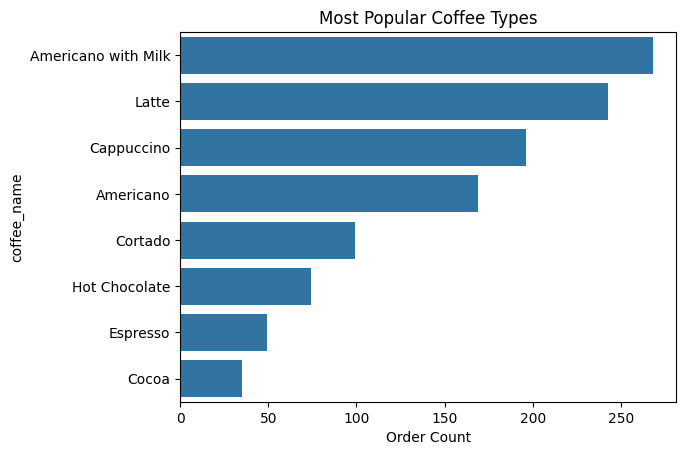

In [9]:
sns.countplot(data=df, y='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title("Most Popular Coffee Types")
plt.xlabel("Order Count")
plt.show()

### 💸 Revenue by Product
Which products bring in the most revenue?


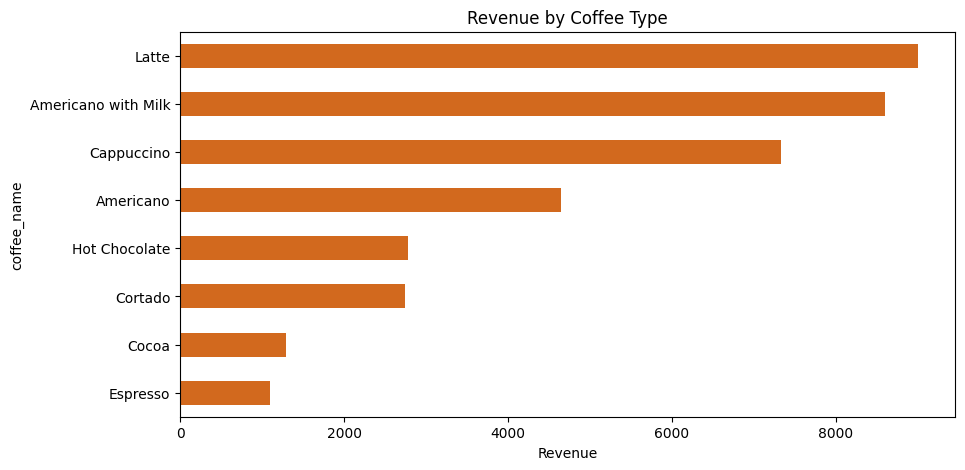

In [10]:
product_revenue = df.groupby("coffee_name")["money"].sum().sort_values()
product_revenue.plot(kind="barh", figsize=(10, 5), color='chocolate')
plt.title("Revenue by Coffee Type")
plt.xlabel("Revenue")
plt.show()

### 📆 Monthly Sales Trend
Track how coffee sales have changed over months.

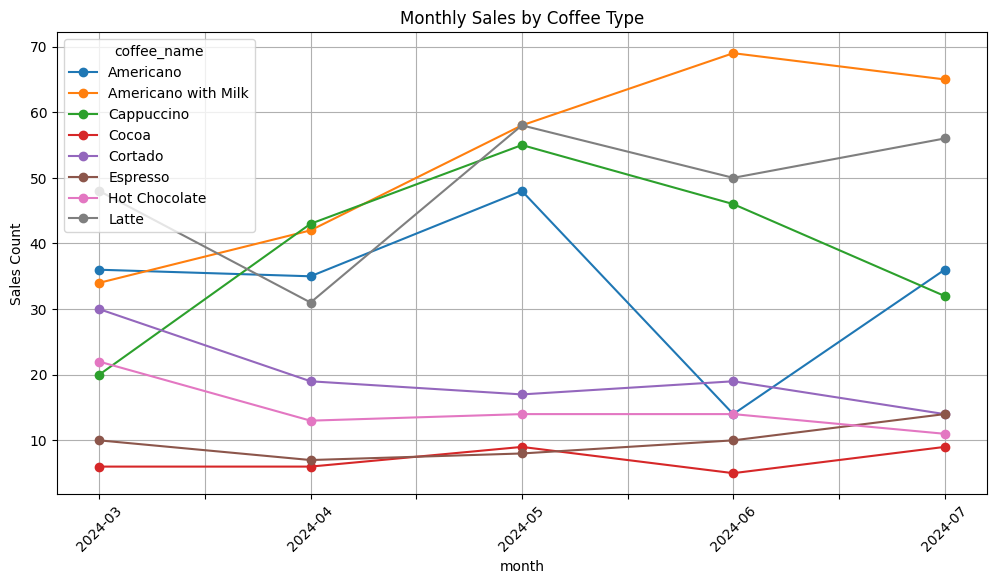

In [15]:
monthly = df.groupby(['month', 'coffee_name']).size().unstack().fillna(0)
monthly.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sales by Coffee Type")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 📅 Weekday Sales Pattern
Which days of the week get the most sales?


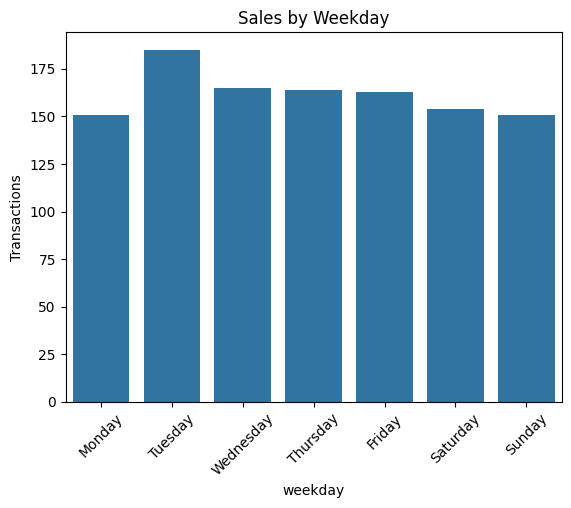

In [11]:
sns.countplot(data=df, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Sales by Weekday")
plt.ylabel("Transactions")
plt.xticks(rotation=45)
plt.show()

### 🕒 Hourly Sales Distribution
When do people buy coffee the most during the day?


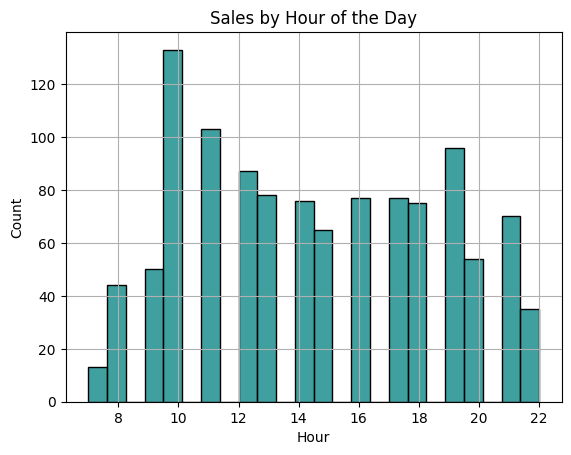

In [12]:
sns.histplot(data=df, x='hour', bins=24, color='teal')
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## Prepare Data for Sales Prediction
We'll now train a model to predict coffee sales amount (`money` column).


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One-hot encoding categorical variables
features = df[['coffee_name', 'cash_type', 'month', 'weekday', 'hour']]
X = pd.get_dummies(features, drop_first=True)

y = df['money']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train a Linear Regression Model and Evaluate


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.83
R² Score: 0.96


In [18]:
# Feature importances
pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"]).sort_values(by="Coefficient", ascending=False)

,Coefficient
coffee_name_Cocoa,9.841745
coffee_name_Latte,9.795512
coffee_name_Cappuccino,9.794181
coffee_name_Hot Chocolate,9.758711
coffee_name_Americano with Milk,4.939909
cash_type_cash,1.313184
hour,0.008944
coffee_name_Cortado,-0.075027
weekday_Wednesday,-0.136010
weekday_Tuesday,-0.220324


# 📌 Conclusion & Business Insights

### Key Takeaways:

-  **Latte** and **Americano with Milk** are top revenue generators.
-  Peak purchase hours are **10 AM** and **7 PM**.
-  **Tuesdays** record the highest number of transactions.
-  Our linear regression model achieved an **R² of ~0.XX**, indicating [add interpretation based on result].

These insights can guide:
- Inventory restocking
- Coffee machine scheduling
- Targeted promotions during high-traffic periods
